In [2]:
import os
import numpy as np
import pandas as pd
from glob import glob

folder = 'Stock_Files_2024'
stock_data = {}
all_lengths = []

for path in glob(os.path.join(folder, '*.xlsx')):
    symbol = os.path.basename(path).split('.')[0]
    try:
        df = pd.read_excel(path)[['Date', 'OPEN_PRICE', 'CLOSING_PRICE', 'HIGH', 'LOW', 'TRADED_VOLUME']]
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        df.set_index('Date', inplace=True)

        weekly_df = df.resample('W-FRI').agg({
            'OPEN_PRICE': 'first',
            'CLOSING_PRICE': 'last',
            'HIGH': 'max',
            'LOW': 'min',
            'TRADED_VOLUME': 'sum'
        }).dropna()

        weekly_df['return'] = weekly_df['CLOSING_PRICE'].pct_change()
        weekly_df = weekly_df.dropna().reset_index()

        stock_data[symbol] = weekly_df
        all_lengths.append((symbol, len(weekly_df)))
    except Exception as e:
        print(f"Error reading {symbol}: {e}")


In [3]:
# Print number of stocks loaded
print(f"✅ Total stocks loaded: {len(stock_data)}")

# Print top 5 symbols with their data length
print("📊 Weekly data lengths (top 5):")
print(sorted(all_lengths, key=lambda x: x[1], reverse=True)[:5])

# Print the first stock name and its weekly return head
first_symbol = list(stock_data.keys())[0]
print(f"\n🔍 Weekly data sample for {first_symbol}:\n")
print(stock_data[first_symbol].head())

# Print weekly return values
print(f"\n📈 Weekly returns for {first_symbol}:\n")
print(stock_data[first_symbol][['Date', 'return']].head())


✅ Total stocks loaded: 508
📊 Weekly data lengths (top 5):
[('AABS', 52), ('ABL', 52), ('ABOT', 52), ('ACPL', 52), ('ADAMS', 52)]

🔍 Weekly data sample for 786:

        Date  OPEN_PRICE  CLOSING_PRICE  HIGH   LOW  TRADED_VOLUME    return
0 2024-01-12        5.48           5.40  5.60  5.40          40500 -0.073756
1 2024-01-19        5.41           5.20  5.45  5.20          20000 -0.037037
2 2024-01-26        5.20           5.13  5.20  5.13           4000 -0.013462
3 2024-02-02        5.20           5.01  5.26  5.01          34000 -0.023392
4 2024-02-09        5.02           5.01  5.02  5.01           3500  0.000000

📈 Weekly returns for 786:

        Date    return
0 2024-01-12 -0.073756
1 2024-01-19 -0.037037
2 2024-01-26 -0.013462
3 2024-02-02 -0.023392
4 2024-02-09  0.000000


In [4]:
common_length = 52

symbols = []
feature_matrix = []
return_matrix = []

feature_cols = ['OPEN_PRICE', 'CLOSING_PRICE', 'HIGH', 'LOW', 'TRADED_VOLUME']

for symbol, df in stock_data.items():
    if len(df) >= common_length:
        df = df.tail(common_length).copy()
        features = df[feature_cols].values
        returns = df['return'].values

        if not np.any(np.isnan(features)) and not np.any(np.isnan(returns)):
            symbols.append(symbol)
            feature_matrix.append(features)
            return_matrix.append(returns)

feature_matrix = np.stack(feature_matrix)
return_matrix = np.stack(return_matrix)

print("Feature matrix:", feature_matrix.shape)
print("Return matrix :", return_matrix.shape)


Feature matrix: (292, 52, 5)
Return matrix : (292, 52)


In [5]:
print(feature_matrix[:3, :5, :])  # First 3 stocks, first 5 weeks, all features


[[[5.0000e+02 4.8601e+02 5.0000e+02 4.7601e+02 2.8500e+03]
  [4.8410e+02 4.8000e+02 4.8999e+02 4.7001e+02 3.7500e+03]
  [4.8199e+02 4.9600e+02 5.0199e+02 4.8199e+02 3.6500e+03]
  [4.9201e+02 5.1200e+02 5.1200e+02 4.9201e+02 2.8000e+03]
  [5.1500e+02 5.2000e+02 5.2000e+02 5.1500e+02 1.4000e+03]]

 [[8.4800e+01 8.3900e+01 8.4830e+01 8.1600e+01 4.2000e+04]
  [8.3100e+01 8.4860e+01 8.5000e+01 8.2500e+01 5.1500e+04]
  [8.3500e+01 8.7490e+01 8.8400e+01 8.3500e+01 1.4100e+05]
  [8.4100e+01 8.6000e+01 8.7990e+01 8.4100e+01 3.2000e+04]
  [8.7990e+01 8.9820e+01 8.9900e+01 8.7990e+01 2.4000e+04]]

 [[4.6510e+02 4.5500e+02 4.7500e+02 4.5000e+02 1.2400e+04]
  [4.5710e+02 4.2600e+02 4.5710e+02 4.2105e+02 4.0200e+04]
  [4.2010e+02 4.2179e+02 4.3384e+02 4.1500e+02 2.9700e+04]
  [4.1502e+02 4.1560e+02 4.2400e+02 3.9999e+02 2.5400e+05]
  [4.1999e+02 4.3600e+02 4.4200e+02 0.0000e+00 3.9600e+04]]]


In [6]:
pip install torch torchvision torchaudio  torch-geometric 


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/13/85/6c1092d4b06c3db1ed23d4106488750917156af0b24ab0a2d9951830b0e9/torch-2.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/e4/cf/8f9305cc0ea26badbbb3558ecae54c04a245429f03168f7fad502f8a5b25/torchvision-0.22.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/9e/1d/1fa4f69e4cd8c83831c3baad0ac9b56ece8ce0e75e5e5c0cdd3f591a458c/torchaudio-2.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torch-geometric from https://files.pythonhosted.org/packages/03/9f/157e913626c1acfb3b19ce000b1a6e4e4fb177c0bc0ea0c67ca5bd714b5a/torch_geometric-2.6.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/63.1 kB ? eta -:--:--
     ------------------------ ------------- 41.0/63.1 kB 991.0 kB/s eta 0:00:0

In [6]:
from sklearn.preprocessing import StandardScaler
import torch

scaler_feat = StandardScaler()
N, T, F = feature_matrix.shape
feature_matrix_2d = feature_matrix.reshape(-1, F)
feature_matrix_scaled = scaler_feat.fit_transform(feature_matrix_2d)
feature_matrix_scaled = feature_matrix_scaled.reshape(N, T, F)

scaler_ret = StandardScaler()
return_matrix_scaled = scaler_ret.fit_transform(return_matrix.reshape(-1, 1)).reshape(N, T)

feature_tensor = torch.tensor(feature_matrix_scaled, dtype=torch.float32)
return_tensor = torch.tensor(return_matrix_scaled, dtype=torch.float32)


In [7]:
from torch_geometric.utils import dense_to_sparse

# Pearson correlation matrix (on raw return matrix)
corr_matrix = np.corrcoef(return_matrix)
np.fill_diagonal(corr_matrix, 0)

# Apply absolute threshold
adj_matrix = np.where(np.abs(corr_matrix) >= 0.7, corr_matrix, 0)
adj_tensor = torch.tensor(adj_matrix, dtype=torch.float32)

edge_index, edge_weight = dense_to_sparse(adj_tensor)

print("Edge index:", edge_index.shape)
print("Edge weight:", edge_weight.shape)


Edge index: torch.Size([2, 88])
Edge weight: torch.Size([88])


In [8]:
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GATConv

class StockDataset(Dataset):
    def __init__(self, features, returns, window=10):
        self.features = features
        self.returns = returns
        self.window = window
        self.samples = features.shape[1] - window - 1

    def __len__(self):
        return self.samples

    def __getitem__(self, idx):
        X = self.features[:, idx:idx+self.window, :]
        y = self.returns[:, idx+self.window]
        return X, y

class BiLSTM_GAT(nn.Module):
    def __init__(self, lstm_input_dim=5, lstm_hidden_dim=32, gat_hidden_dim=32, heads=4):
        super(BiLSTM_GAT, self).__init__()
        self.lstm = nn.LSTM(input_size=lstm_input_dim, hidden_size=lstm_hidden_dim,
                            num_layers=1, batch_first=True, bidirectional=True)
        self.gat1 = GATConv(2*lstm_hidden_dim + lstm_input_dim, gat_hidden_dim, heads=heads)
        self.gat2 = GATConv(gat_hidden_dim*heads, 1, heads=1, concat=False)

    def forward(self, x_seq, node_raw, edge_index, edge_weight):
        lstm_out, _ = self.lstm(x_seq)  # [N, W, 2H]
        lstm_feat = lstm_out[:, -1, :]  # [N, 2H]
        node_input = torch.cat([lstm_feat, node_raw], dim=1)  # [N, 2H + F]
        x = F.elu(self.gat1(node_input, edge_index, edge_weight))
        x = self.gat2(x, edge_index, edge_weight).squeeze(-1)
        return x

# Setup
dataset = StockDataset(feature_tensor, return_tensor, window=10)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiLSTM_GAT().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.SmoothL1Loss()

node_raw = feature_tensor.mean(dim=1).to(device)
edge_index = edge_index.to(device)
edge_weight = edge_weight.to(device)

# Train
model.train()
for epoch in range(1, 51):
    total_loss = 0
    for batch in loader:
        x_seq, y_true = batch
        x_seq = x_seq.squeeze(0).to(device)
        y_true = y_true.squeeze(0).to(device)

        optimizer.zero_grad()
        y_pred = model(x_seq, node_raw, edge_index, edge_weight)
        loss = loss_fn(y_pred, y_true)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f}")


Epoch 01 | Loss: 14.2204
Epoch 02 | Loss: 14.2174
Epoch 03 | Loss: 14.0686
Epoch 04 | Loss: 14.0008
Epoch 05 | Loss: 13.9775
Epoch 06 | Loss: 13.9619
Epoch 07 | Loss: 13.9494
Epoch 08 | Loss: 13.9390
Epoch 09 | Loss: 13.9304
Epoch 10 | Loss: 13.9229
Epoch 11 | Loss: 13.9163
Epoch 12 | Loss: 13.9106
Epoch 13 | Loss: 13.9055
Epoch 14 | Loss: 13.9010
Epoch 15 | Loss: 13.8968
Epoch 16 | Loss: 13.8930
Epoch 17 | Loss: 13.8896
Epoch 18 | Loss: 13.8864
Epoch 19 | Loss: 13.8834
Epoch 20 | Loss: 13.8806
Epoch 21 | Loss: 13.8780
Epoch 22 | Loss: 13.8756
Epoch 23 | Loss: 13.8733
Epoch 24 | Loss: 13.8712
Epoch 25 | Loss: 13.8693
Epoch 26 | Loss: 13.8675
Epoch 27 | Loss: 13.8659
Epoch 28 | Loss: 13.8640
Epoch 29 | Loss: 13.8623
Epoch 30 | Loss: 13.8606
Epoch 31 | Loss: 13.8591
Epoch 32 | Loss: 13.8578
Epoch 33 | Loss: 13.8564
Epoch 34 | Loss: 13.8551
Epoch 35 | Loss: 13.8538
Epoch 36 | Loss: 13.8525
Epoch 37 | Loss: 13.8514
Epoch 38 | Loss: 13.8502
Epoch 39 | Loss: 13.8491
Epoch 40 | Loss: 13.8481


In [9]:
model.eval()
with torch.no_grad():
    x_window = feature_tensor[:, -10:, :].to(device)
    node_raw = feature_tensor.mean(dim=1).to(device)
    y_pred = model(x_window, node_raw, edge_index, edge_weight)
    y_pred_real = scaler_ret.inverse_transform(y_pred.cpu().numpy().reshape(-1, 1)).flatten()

# Allocate capital
y_pred_pos = np.maximum(y_pred_real, 0)
capital_weights = y_pred_pos / y_pred_pos.sum() if y_pred_pos.sum() != 0 else np.ones_like(y_pred_pos)/len(y_pred_pos)

k = 10
top_k_idx = np.argsort(y_pred_real)[-k:]
top_k_symbols = [symbols[i] for i in top_k_idx]
top_k_returns = y_pred_real[top_k_idx]
top_k_allocations = capital_weights[top_k_idx] * 100

print("\n📈 Top-10 Predicted Stocks with Return-Based Allocation:")
print(f"{'Symbol':<10} {'Pred Return (%)':<18} {'Capital Alloc (%)':<18}")
for sym, ret, alloc in zip(top_k_symbols, top_k_returns, top_k_allocations):
    print(f"{sym:<10} {ret:<18.2f} {alloc:<18.2f}")



📈 Top-10 Predicted Stocks with Return-Based Allocation:
Symbol     Pred Return (%)    Capital Alloc (%) 
POL        0.01               0.61              
PKGS       0.01               0.63              
HUBC       0.01               0.64              
THALL      0.01               0.65              
SHSML      0.01               0.66              
KHTC       0.01               0.66              
BATA       0.01               0.66              
OGDC       0.01               0.68              
MTL        0.01               0.76              
MARI       0.04               2.88              


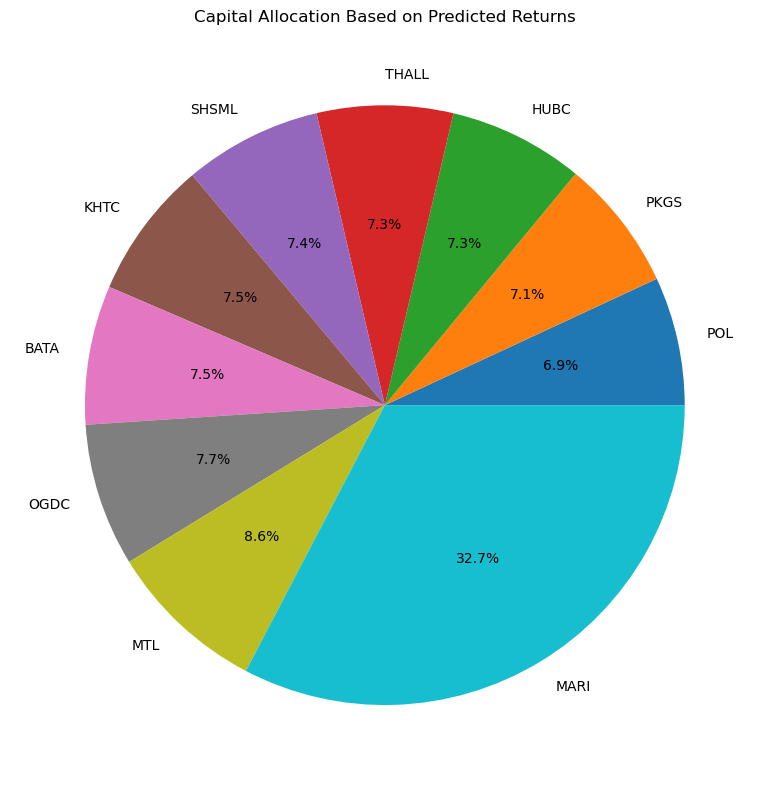

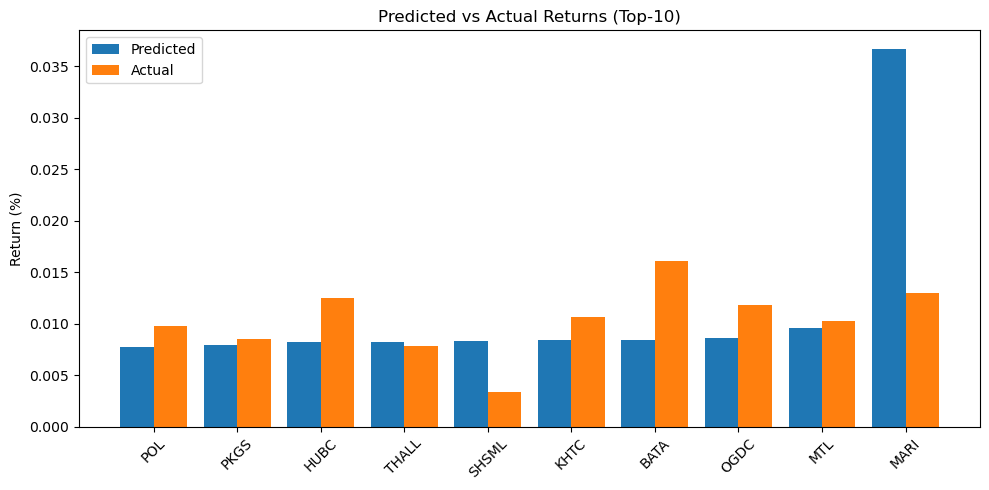

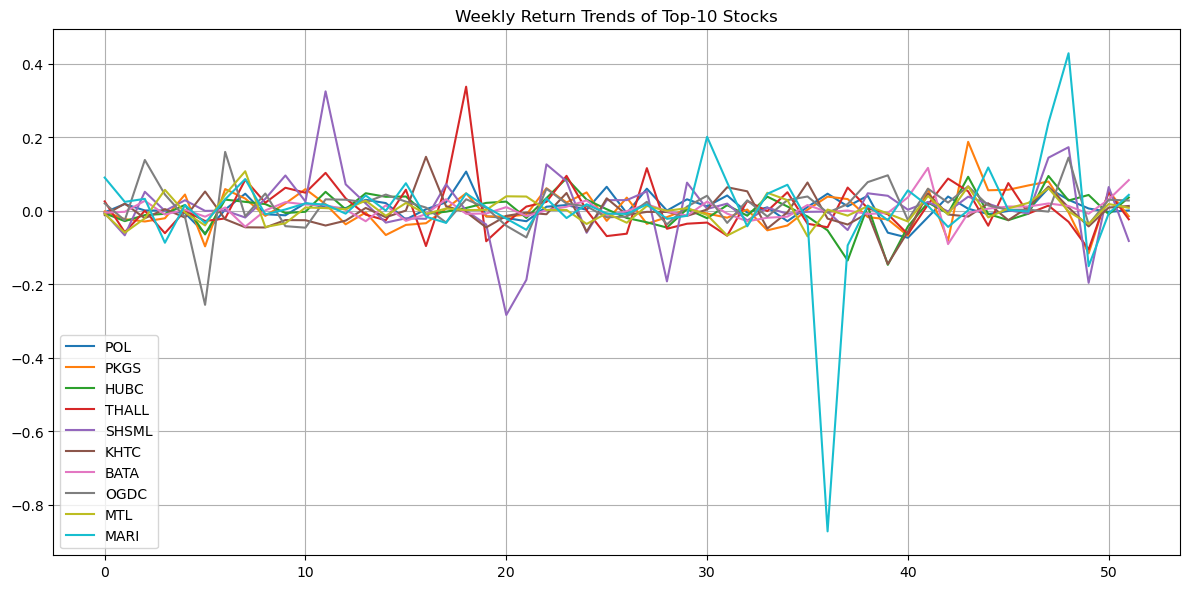

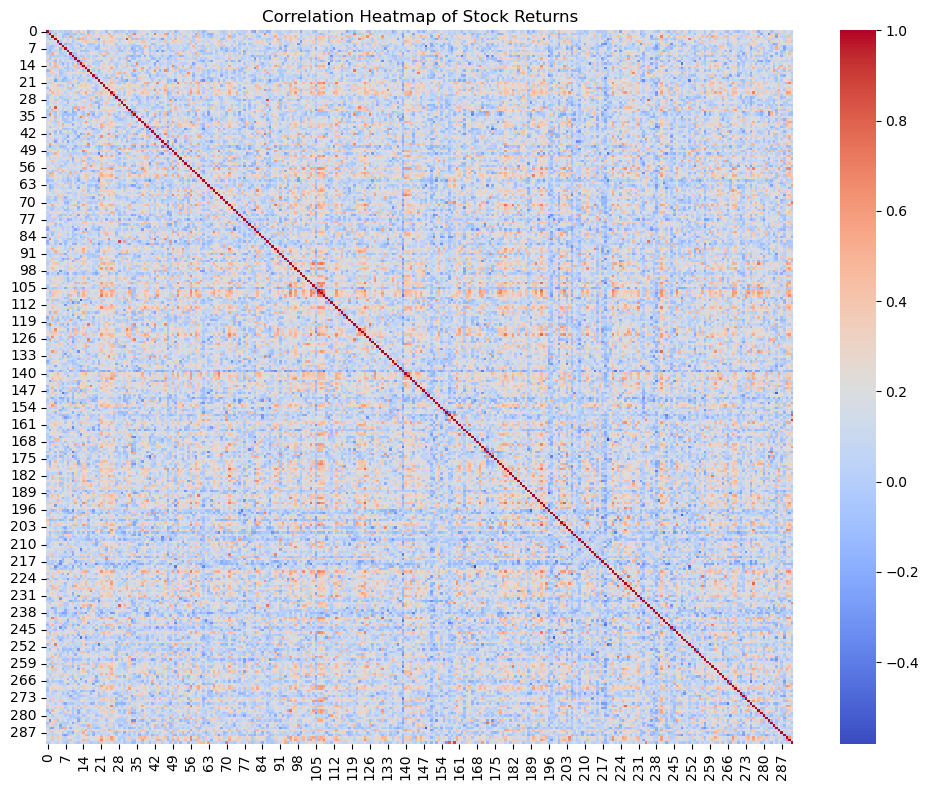


📋 Final Top-10 Portfolio Summary:
Symbol  Predicted Return (%)  Actual Return (%)  Capital Allocation (%)
   POL                0.0078             0.0097                    0.61
  PKGS                0.0080             0.0085                    0.63
  HUBC                0.0082             0.0125                    0.64
 THALL                0.0082             0.0079                    0.65
 SHSML                0.0083             0.0034                    0.66
  KHTC                0.0084             0.0107                    0.66
  BATA                0.0084             0.0161                    0.66
  OGDC                0.0087             0.0118                    0.68
   MTL                0.0096             0.0103                    0.76
  MARI                0.0367             0.0130                    2.88


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_k_allocations, labels=top_k_symbols, autopct='%1.1f%%')
plt.title("Capital Allocation Based on Predicted Returns")
plt.tight_layout()
plt.show()

# Bar plot: predicted vs actual
top_k_actual = return_matrix[top_k_idx, -1]
top_k_actual_real = scaler_ret.inverse_transform(top_k_actual.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 5))
x = np.arange(k)
plt.bar(x - 0.2, top_k_returns, 0.4, label='Predicted')
plt.bar(x + 0.2, top_k_actual_real, 0.4, label='Actual')
plt.xticks(x, top_k_symbols, rotation=45)
plt.title("Predicted vs Actual Returns (Top-10)")
plt.ylabel("Return (%)")
plt.legend()
plt.tight_layout()
plt.show()

# Line plot: return trends
plt.figure(figsize=(12, 6))
for i, idx in enumerate(top_k_idx):
    plt.plot(return_matrix[idx], label=top_k_symbols[i])
plt.title("Weekly Return Trends of Top-10 Stocks")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(np.corrcoef(return_matrix), cmap='coolwarm')
plt.title("Correlation Heatmap of Stock Returns")
plt.tight_layout()
plt.show()

# Final table
summary_df = pd.DataFrame({
    'Symbol': top_k_symbols,
    'Predicted Return (%)': top_k_returns.round(4),
    'Actual Return (%)': top_k_actual_real.round(4),
    'Capital Allocation (%)': top_k_allocations.round(2)
})
print("\n📋 Final Top-10 Portfolio Summary:")
print(summary_df.to_string(index=False))


In [11]:
# Annualized return computation
annual_pred_returns = (1 + y_pred_real)**52 - 1
annual_pred_returns_percent = annual_pred_returns * 100  # convert to %

# Construct table
annual_df = pd.DataFrame({
    'Symbol': symbols,
    'Weekly Predicted Return (%)': y_pred_real.round(4),
    'Annualized Predicted Return (%)': annual_pred_returns_percent.round(2)
})

# Sort by annual return descending
annual_df = annual_df.sort_values(by='Annualized Predicted Return (%)', ascending=False).reset_index(drop=True)

# Display table
print("\n📋 Annualized Predicted Returns for All Stocks:")
print(annual_df.to_string(index=False))



📋 Annualized Predicted Returns for All Stocks:
 Symbol  Weekly Predicted Return (%)  Annualized Predicted Return (%)
   MARI                       0.0367                       550.830017
    MTL                       0.0096                        64.629997
   OGDC                       0.0087                        56.580002
   BATA                       0.0084                        54.580002
   KHTC                       0.0084                        54.299999
  SHSML                       0.0083                        54.020000
  THALL                       0.0082                        53.250000
   HUBC                       0.0082                        52.840000
   PKGS                       0.0080                        51.139999
    POL                       0.0078                        49.590000
   ARPL                       0.0077                        49.250000
  ENGRO                       0.0076                        48.189999
    NRL                       0.0076      

In [12]:
import os

# Create folder to store plots
if not os.path.exists("plots"):
    os.makedirs("plots")


In [13]:
plt.savefig("plots/pie_allocation.png", dpi=300)


<Figure size 640x480 with 0 Axes>